# Investigating snapshot bases

A few tests here. First we investigate the sparsity claims about a random snapshot basis. If we have an understanding of the decay of coefficients for a projection, maybe this will point us in the right direction for greedy approaches to building the space, or whether there is any hope that some sort of compressed sensing type approach will work for this problem.


In [1]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyApproxTools as pat
importlib.reload(pat)

%matplotlib inline

### Snapshot basis

We consider the usual PDE problem 
$$-\mathrm{div}(a(y) \nabla u) = f$$
on the doman $D=[0,1]^2$ and take $a(y)$ to be the "checkerboard" random field. 

The space we operate in is $V = H_0^1([0,1]^2)$.

Our approximation space is the random snapshot basis, $V_n = \mathrm{span}\{ u_h(a(y_1)), \ldots, u_h(a(y_n)) \}$.

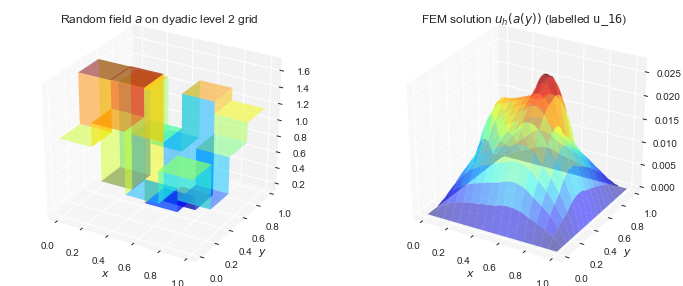

In [2]:
fem_div = 7

a_bar = 1.0
c = 0.9
field_div = 2
side_n = 2**field_div

np.random.seed(3)
point_gen = pat.MonteCarlo(d=side_n*side_n, n=1, lims=[-1, 1])
a = pat.PWConstantSqDyadicL2(a_bar + c * point_gen.points[0,:].reshape([side_n, side_n]), div=field_div)
fem = pat.DyadicFEMSolver(div=fem_div, rand_field=a, f=1.0)
fem.solve()

u = fem.u

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
a.plot(ax, title='Random field $a$ on dyadic level 2 grid')
ax = fig.add_subplot(1, 2, 2, projection='3d')
fem.u.plot(ax, title='FEM solution $u_h(a(y))$ (labelled $\mathtt{u\_16}$)')
plt.show()

In [4]:
ns = [10, 20, 50, 100]
n = ns[-1]

Vn_sin = pat.make_pw_sin_basis(div=fem_div)
Vn_red, fields = pat.make_pw_reduced_basis(n, field_div=field_div, fem_div=fem_div)

cs_sin = []
cs_red = []

for i in range(len(ns)):
    Pu_red, c_red = Vn_red.subspace(slice(0,ns[i])).project(u, return_coeffs=True)
    cs_red.append(c_red)
    Pu_sin, c_sin = Vn_sin.subspace(slice(0,ns[i])).project(u, return_coeffs=True)
    cs_sin.append(c_sin)
    

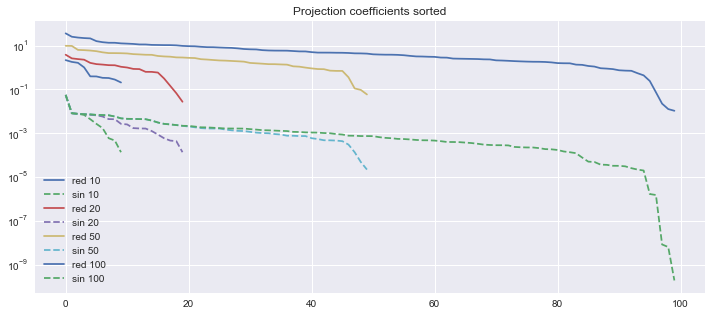

In [13]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, title=r'Projection coefficients sorted')

for i in range(len(ns)):
    plt.semilogy(np.sort(np.abs(cs_red[i]))[::-1], label='red {0}'.format(len(cs_red[i])))
    plt.semilogy(np.sort(np.abs(cs_sin[i]))[::-1], '--', label='sin {0}'.format(len(cs_sin[i])))
plt.legend()
plt.show()